### Remove scroll from figures

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Extend the size of the Window

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
import numpy as np
import glob
from astropy.io import fits
import matplotlib.pylab as plt
import pandas as pd
from sunpy.map import Map
import astropy.units as u
from reproject import reproject_exact, reproject_interp #use reproject_interp if you want it done quicker.
from skimage.transform import resize

### Define colors an colormaps

In [22]:
# Color Axis limits
vmin = -2000
vmax = 2000

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [(0.00, 0.00, 0.00),
      (0.31, 0.24, 0.00),
      (0.43, 0.16, 0.49),
      (0.32, 0.70, 0.30),
      (0.45, 0.70, 0.90),
      (1.00, 0.82, 0.67)]

# Colormap Definition
current_cmap = plt.cm.get_cmap('hmimag')
# current_cmap = plt.cm.get_cmap('seismic')
current_cmap.set_bad(color='black')

---

## Specify paths and load index match file

In [24]:
source = 'MDI-NEW'
source = 'GONG'
prep_path = '/patches2/to-ml-rp-gong/validate/2014/6/1/'
glob.glob(prep_path+'HMI*.npy')

['/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-195824_456.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-194624_620.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-205824_323.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-182224_653.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-195824_491.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-194624_439.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-191024_455.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-213424_472.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-193424_684.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-184624_452.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-184624_424.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-214624_682.npy',
 '/patches2/to-ml-rp-gong/validate/2014/6/1/HMI_20140601-205824_458.npy',
 '/patches2/to-ml-rp-gong/validate/201

In [25]:
files = pd.DataFrame(glob.glob(prep_path+'HMI*.npy'), columns=['hmi_file'])
files['src_file'] = files['hmi_file']
files

hmi_file  \
0     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
1     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
3     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
4     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
5     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
6     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
7     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
8     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
9     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
10    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
11    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
12    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
13    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
14    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
15    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
16    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
17    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
18    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
19    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
20    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
21    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
22    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
23    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
24    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
25    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
26    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
27    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
28    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
29    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
...                                                 ...   
2120  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2121  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2122  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2123  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2124  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2125  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2126  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2127  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2128  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2129  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2130  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2131  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2132  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2133  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2134  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2135  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2136  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2137  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2138  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2139  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2140  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2141  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2142  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2143  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2144  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2145  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2146  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2147  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2148  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2149  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   

                                               src_file  
0     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...  
1     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...  
2     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...  
3     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...  
4     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...  
5     /patches2/to-ml-rp-gong/validate/2

In [26]:
for i in np.arange(0, files.shape[0]):
    time_hmi = int(files.loc[i,'hmi_file'].split('_')[1].split('-')[1])
    tmp = pd.DataFrame(glob.glob(prep_path + source + '*' + files.loc[i,'hmi_file'].split('_')[-1].split('.')[0] + '*.npy'), columns=['src_file'])
    tmp['time'] = tmp['src_file'].map(lambda x: int(x.split('_')[1].split('-')[1])) 
    inx = (np.min(np.abs(time_hmi-tmp['time']))==np.abs(time_hmi-tmp['time'])).to_numpy().nonzero()[0]
    if len(inx)>0:
        files.loc[i,'src_file'] = tmp.loc[inx[0],'src_file']
    else:
        files.loc[i,'src_file'] = ''
    
files

hmi_file  \
0     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
1     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
3     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
4     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
5     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
6     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
7     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
8     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
9     /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
10    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
11    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
12    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
13    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
14    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
15    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
16    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
17    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
18    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
19    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
20    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
21    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
22    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
23    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
24    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
25    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
26    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
27    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
28    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
29    /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
...                                                 ...   
2120  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2121  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2122  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2123  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2124  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2125  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2126  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2127  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2128  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2129  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2130  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2131  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2132  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2133  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2134  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2135  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2136  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2137  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2138  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2139  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2140  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2141  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2142  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2143  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2144  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2145  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2146  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2147  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2148  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   
2149  /patches2/to-ml-rp-gong/validate/2014/6/1/HMI_...   

                                               src_file  
0     /patches2/to-ml-rp-gong/validate/2014/6/1/GONG...  
1     /patches2/to-ml-rp-gong/validate/2014/6/1/GONG...  
2     /patches2/to-ml-rp-gong/validate/2014/6/1/GONG...  
3     /patches2/to-ml-rp-gong/validate/2014/6/1/GONG...  
4     /patches2/to-ml-rp-gong/validate/2014/6/1/GONG...  
5     /patches2/to-ml-rp-gong/validate/2

## Print random patch

source:  0.0 (26, 26)
target:  0.007488905325443787 (104, 104)


Text(0.99, 0.99, 'Target')

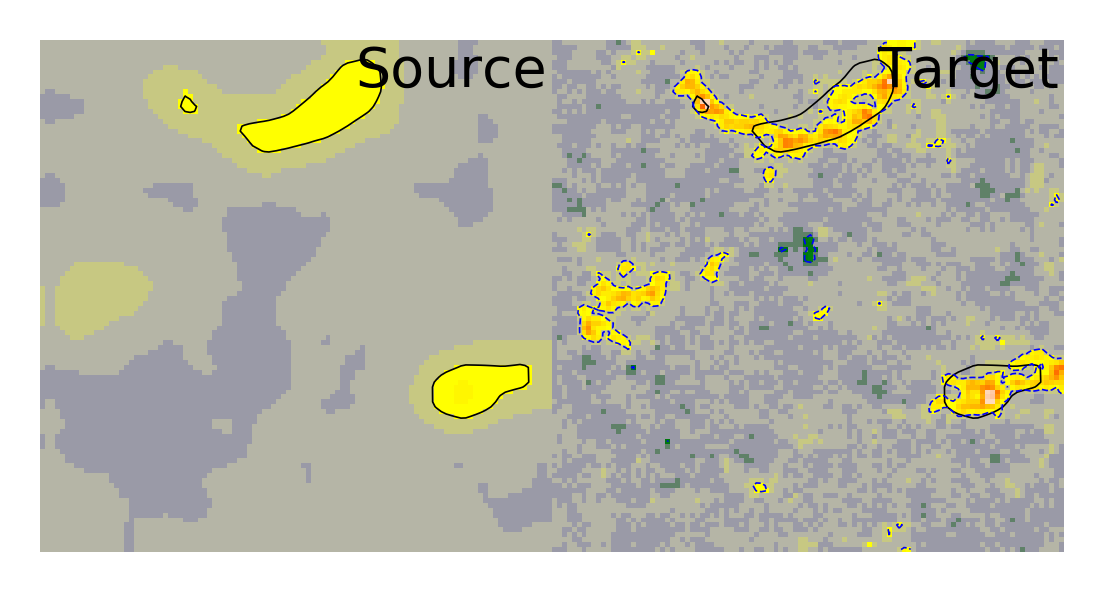

In [36]:
inx = int(np.random.rand(1)*files.shape[0])

target = np.load(files.loc[inx,'hmi_file'])[0,:,:]
source = resize(np.load(files.loc[inx,'src_file'])[0,:,:], (target.shape[0], target.shape[1]))

print('source: ', np.sum(source>20)/(source.shape[0]*source.shape[1]), np.load(files.loc[inx,'src_file'])[0,:,:].shape)
print('target: ', np.sum(target>20)/(target.shape[0]*target.shape[1]), target.shape)

# contours = np.arange(-300,300,50)
contours = np.array([-20,20])*1.6

# Size definitions
dpi = 400
pxx = 128*4   # Horizontal size of each panel
pxy = 128*4   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

# Inferred
ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.imshow(source, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')

x, y = np.meshgrid(*[np.arange(v) for v in source.shape])
ax1.contour(x, y, source, contours, colors='k', linestyles='-', linewidths=0.3)

ax1.set_axis_off()
ax1.text(0.99, 0.99, 'Source', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax1.transAxes)



ax2 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy])
ax2.imshow(target, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')
ax2.contour(x, y, source, contours, colors='k', linestyles='-', linewidths=0.3)
ax2.contour(x, y, target, contours, colors='b', linestyles='--', linewidths=0.3)



ax2.set_axis_off()
ax2.text(0.99, 0.99, 'Target', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax2.transAxes)



# ax3 = fig.add_axes([ppadh, ppadv-ppxy, ppxx, ppxy])
# ax3.imshow(mdi_hmi_map.data-MDImap.data, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')
# ax3.set_axis_off()
# ax3.text(0.99, 0.99, 'Difference', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax3.transAxes)
# ax3.set_xlim([indices[0]-w_width//2, indices[0]+w_width//2])
# ax3.set_ylim([indices[0]-w_height//2, indices[0]+w_height//2])

# # fig.savefig(label + '_FD.png', bbox_inches='tight', dpi = dpi, pad_inches=0)

In [41]:
source.shape

(104, 104)

In [42]:
np.load(files.loc[inx,'src_file'])[0,:,:].shape

(26, 26)

In [44]:
26*32

832